## Test on healthy image

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
model = load_model('model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 23,850,500
Trainable params: 262,788
Non-trainable params: 23,587,712
_________________________________________________________________


In [5]:
import numpy as np
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array

x = tf.keras.utils.load_img(
    'test.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=[300,300],
    interpolation='nearest',
)
x = tf.keras.preprocessing.image.img_to_array(x)
x = x/255.0
x = np.array([x])

In [6]:
model.predict(x)

1/1 [==============================] - 2s 2s/step


array([[0.11570001, 0.46742785, 0.40599984, 0.0108724 ]], dtype=float32)

## Test on the 'test' folder

In [24]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Rice Leaf Diseases'
test_dir = os.path.join(base_dir, 'test')

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(300,300),
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 295 images belonging to 4 classes.


In [30]:
# Get images and labels batch from validation dataset generator

test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)

print("Test batch shape:", test_image_batch.shape)
print("Label batch shape: ", test_label_batch.shape)

Test batch shape: (64, 300, 300, 3)
Label batch shape:  (64, 4)


In [31]:
dataset_labels = sorted(test_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Bacterialblight' 'Blast' 'Brownspot' 'Tungro']


In [32]:
tf_model_predictions = model(test_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (64, 4)


In [33]:
# Convert prediction results to Pandas dataframe, for better visualization
import pandas as pd

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Bacterialblight,Blast,Brownspot,Tungro
0,0.140199,0.405339,0.269011,0.185451
1,0.029834,0.118009,0.837684,0.014472
2,0.972654,0.013340,0.013102,0.000904
3,0.053330,0.203909,0.719794,0.022967
4,0.044489,0.105475,0.836640,0.013397


In [34]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

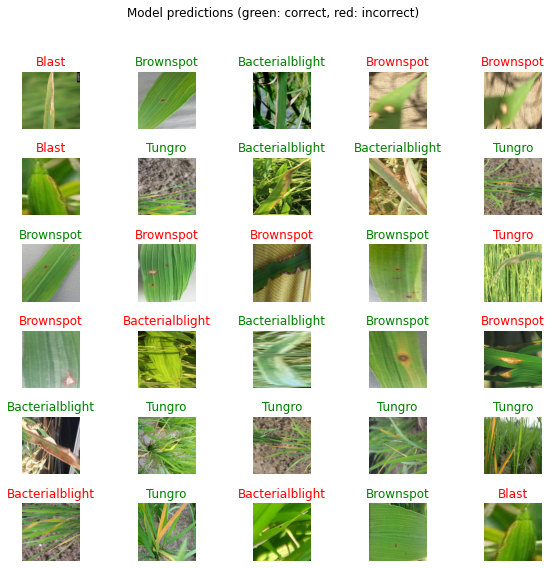

In [37]:
# Print images batch and labels predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(test_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## Test TFlite on healthy image

In [19]:
# Load TFLite model and allocate tensors.
  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [23]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], x)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.11569633 0.46742406 0.40600696 0.01087269]]
